In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import time
from scipy.stats import uniform

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm, linear_model, datasets, tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay)

In [145]:
df = pd.read_csv("bank-additional-full.csv",sep=';')
df = df[["age","job","marital","education","housing","loan","campaign","previous","y"]]

In [146]:
df.replace('unknown', pd.NA, inplace=True)
df.dropna(inplace=True)
df.shape


pd.get_dummies(df.job, drop_first=False)
df = df.join(pd.get_dummies(df.job, drop_first=False))


pd.get_dummies(df.marital, drop_first=False)
df = df.join(pd.get_dummies(df.marital, drop_first=False))


education_unique_values = df['education'].unique()
print(education_unique_values)
education_mapping = {
    'illiterate': 0,
    'basic.4y': 4,
    'basic.6y': 6,
    'basic.9y': 9,
    'high.school': 12,
    'professional.course': 14,
    'university.degree': 16
}

df['education'] = df['education'].map(education_mapping)

binary = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).nunique() == 2]
df[binary] = df[binary].apply(lambda x: x.map({'yes': 1, 'no': 0}))

df.replace({True: 1, False: 0}, inplace=True)
df.drop(['job', 'marital'], axis=1, inplace=True)
df.head()

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


,age,education,housing,loan,campaign,previous,y,admin.,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,56,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,12,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,12,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,6,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,12,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [169]:
X = df.drop('y', axis=1)
y = df['y']

# 80% for training
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y,
test_size=.2, random_state=42, stratify=y)

# of remaining 20%, split in half to get 10% validation, 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp,
test_size=.5, random_state=42, stratify=y_tmp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [151]:
classifier = linear_model.LogisticRegression(max_iter = 5000)
parameters = {"C": [0.01, 1, 100]}


clf = GridSearchCV(classifier, parameters)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
logistic_times = end-start
best_clf = clf.best_estimator_
accuracy = best_clf.score(X_valid,y_valid)

print(f'Accuracy for {best_clf} is {accuracy:.3}')
print(f'Logistic Regression took {logistic_times:.3} seconds.')

# Use the model on test data
logistic_accuracy = best_clf.score(X_test,y_test)
print(f'In the test data, the accuracy is {logistic_accuracy:.3}.')

Accuracy for LogisticRegression(C=1, max_iter=5000) is 0.89
Logistic Regression took 4.47 seconds.
In the test data, the accuracy is 0.892.


In [153]:
y_hat = best_clf.predict(X_test)

In [154]:
#precision_score(y_test, y_hat)
recall_score(y_test, y_hat)

0.05868544600938967

In [24]:
from sklearn.metrics import roc_curve, auc

models = [
    ("Model 1", LogisticRegression(C = 0.01, max_iter = 5000)),
    ("Model 2", LogisticRegression(C= 1, max_iter = 5000)),
    ("Model 3", LogisticRegression(C= 100, max_iter = 5000)),
    ("Model 3", LogisticRegression(C= 10, max_iter = 5000)),
    ("Model 3", LogisticRegression(C= 0.1, max_iter = 5000))
]
     
#plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name, model in models:
    model.fit(X_train, y_train)
    #RocCurveDisplay.from_estimator(model, X_test, y_test)
    #plt.plot([0, 1], [0, 1], ':k', label='merely guessing')
    #print(fpr)
    y_hat = model.predict(X_test)
    #y_hat
    print(model, model.score(X_test, y_test), confusion_matrix(y_true=y_test, y_pred=y_hat))

    #plt.show()

# Plot random guessing line
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

#plt.figure(figsize=(8, 6))

# for i 
# RocCurveDisplay.from_estimator(clf, X_test, y_test)
# plt.plot([0, 1], [0, 1], ':k', label='merely guessing')
#plt.grid(True)
#plt.show()

LogisticRegression(C=0.01, max_iter=5000) 0.8922875816993464 [[3388   11]
 [ 401   25]]
LogisticRegression(C=1, max_iter=5000) 0.8920261437908497 [[3387   12]
 [ 401   25]]
LogisticRegression(C=100, max_iter=5000) 0.8920261437908497 [[3387   12]
 [ 401   25]]
LogisticRegression(C=10, max_iter=5000) 0.8920261437908497 [[3387   12]
 [ 401   25]]
LogisticRegression(C=0.1, max_iter=5000) 0.8920261437908497 [[3387   12]
 [ 401   25]]


In [75]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3399
           1       0.69      0.06      0.11       426

    accuracy                           0.89      3825
   macro avg       0.79      0.53      0.53      3825
weighted avg       0.87      0.89      0.85      3825



Text(0.5, 1.0, 'Logistic Regression Model Coefficients')

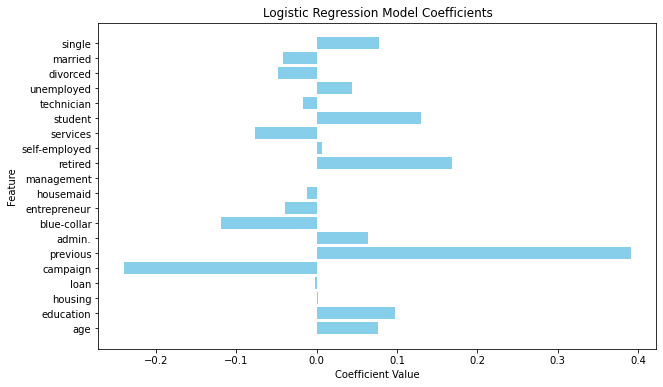

In [68]:
coefficients = best_clf.coef_[0]
feature_names = [f'{X.columns[i]}' for i in range(len(coefficients))]

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Model Coefficients")

In [155]:
y_hat = best_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_hat))

,0,1
0,3387,12
1,401,25


In [60]:
df[df['student'] == 1]

,age,education,housing,loan,campaign,previous,y,admin.,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
205,35,16,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206,35,16,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
209,35,16,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
210,36,9,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
267,31,16,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41088,18,4,1,0,1,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
41094,19,9,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
41098,29,12,1,1,1,3,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
41134,25,12,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [89]:
recall_score(y_test, y_hat)

0.05868544600938967

In [62]:
best_clf.coef_

array([[ 0.07648762,  0.09701219,  0.00177421, -0.00251148, -0.23963044,
         0.39109697,  0.06426687, -0.11842008, -0.03973994, -0.01203129,
         0.00062312,  0.1687839 ,  0.00718411, -0.07591037,  0.12953666,
        -0.01718034,  0.04359271, -0.04740946, -0.04135115,  0.07808993]])

<BarContainer object of 8 artists>

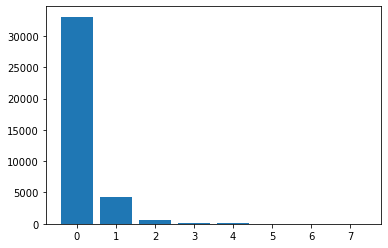

In [86]:
plt.bar(df['previous'].unique(), height=df['previous'].value_counts())

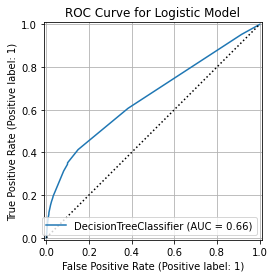

In [140]:
RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ':k', label='merely guessing')
plt.grid()
plt.title("ROC Curve for Logistic Model")
plt.savefig("logisticroccurve.png")

In [141]:
y_hat = best_clf.predict(X_test)

In [143]:
recall_score(y_test, y_hat)

0.09101516919486581

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': [1, 3, 5, 7]}
clf = GridSearchCV(classifier, parameters)

start = time.time()
clf.fit(X_train, y_train)
end = time.time()
tree_times = end-start

best_clf = clf.best_estimator_
accuracy = best_clf.score(X_valid,y_valid)

print(f'Accuracy for {best_clf} is {accuracy:.3}')
print(f'Decision Tree took {tree_times:.3} seconds.')


tree_accuracy = best_clf.score(X_test,y_test)

print(f'In the test data, the accuracy is {tree_accuracy:.3}.')

Accuracy for DecisionTreeClassifier(criterion='entropy', max_depth=5) is 0.89
Decision Tree took 0.617 seconds.
In the test data, the accuracy is 0.891.


/Users/ctrimborn/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


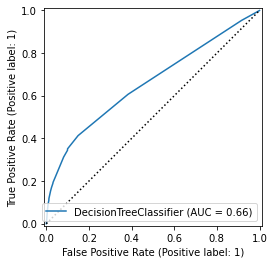

In [105]:
RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ':k', label='merely guessing')
plt.

In [106]:
y_hat = best_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_hat))

,0,1
0,6736,56
1,779,78


In [107]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6792
           1       0.58      0.09      0.16       857

    accuracy                           0.89      7649
   macro avg       0.74      0.54      0.55      7649
weighted avg       0.86      0.89      0.85      7649



In [148]:
model = SVC(kernel='rbf')

start = time.time()
model.fit(X_train, y_train)
end = time.time()
svm_times = end-start

y_pred = model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy of support vector machine is, {svm_accuracy:.3}')
print(f'support vector machine took {svm_times:.3} seconds.')

The accuracy of support vector machine is, 0.892
support vector machine took 44.0 seconds.


In [149]:
#y_hat = model.predict(X_test)
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred))

,0,1
0,3387,12
1,402,24


In [170]:
classifiers = [linear_model.LogisticRegression(max_iter = 5000), DecisionTreeClassifier(criterion = 'entropy'),
               KNeighborsClassifier()]
parameters = [{"C": [0.01, 1, 100]}, 
             {"max_depth": [1,3,5,7]}, {"n_neighbors": [1,2,3,4]}]
best_index = -1
best_accuracy = -np.Inf
best_clf = None
best_recall = -np.Inf

for i in range(3):
    classifier = classifiers[i]
    parameter = parameters[i]
    clf = GridSearchCV(classifier, parameter)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_valid, y_valid)
    y_hat = clf.predict(X_test)
    recall = recall_score(y_test, y_hat)
    
    if recall > best_recall:
        best_accuracy = accuracy
        best_recall = recall
        best_index = i
        best_clf = clf
print("Best classifier index:", best_index)
print("Best accuracy:", best_accuracy)
print("Best classifier:", best_clf)

Best classifier index: 1
Best accuracy: 0.8909518828451883
Best classifier: GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 3, 5, 7]})


In [163]:
y_hat = best_clf.predict(X_test)

In [164]:
recall_score(y_test, y_hat)

0.046948356807511735

In [171]:
best_recall

0.09859154929577464

<AxesSubplot:>

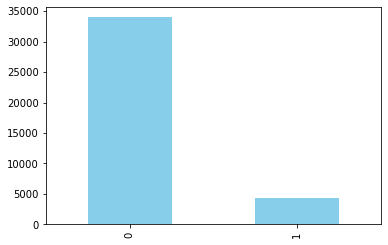

In [178]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rs = RandomOverSampler()
X_resampled, y_resampled = rs.fit_resample(X, y)